In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

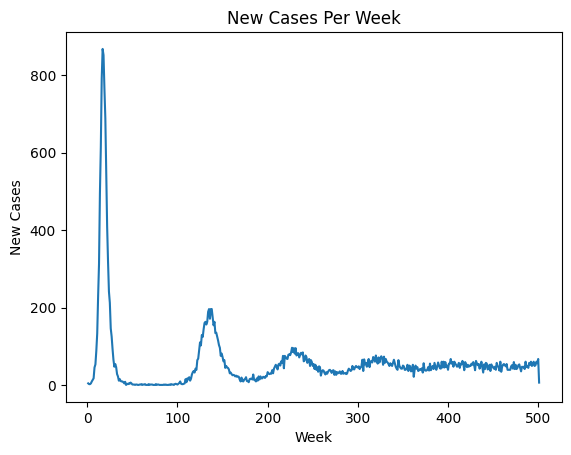

In [9]:
df = pd.read_csv("HW4_all_weeks.csv", header=0, names=["x", "y"])

plt.plot(df["x"], df["y"])

plt.xlabel("Week")
plt.ylabel("New Cases")
plt.title("New Cases Per Week")

plt.show()

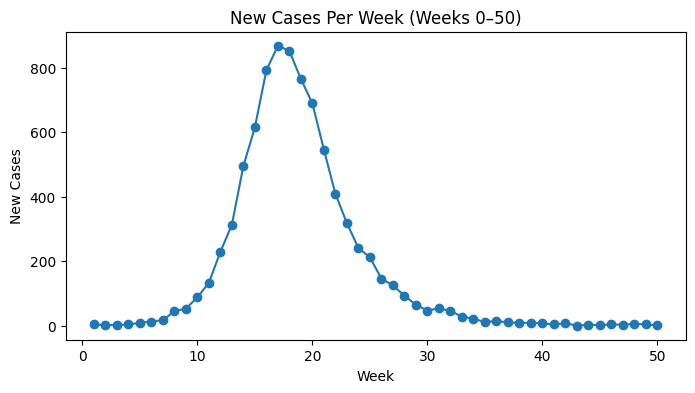

In [12]:
df_filtered = df[(df["x"] >= 0) & (df["x"] <= 50)]

plt.figure(figsize=(8, 4))
plt.plot(df_filtered["x"], df_filtered["y"], marker="o")
plt.xlabel("Week")
plt.ylabel("New Cases")
plt.title("New Cases Per Week (Weeks 0–50)")
# plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:              log_cases   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     196.1
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.05e-07
Time:                        10:48:50   Log-Likelihood:                0.86695
No. Observations:                  11   AIC:                             2.266
Df Residuals:                       9   BIC:                             3.062
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2665      0.315      4.016      0.0

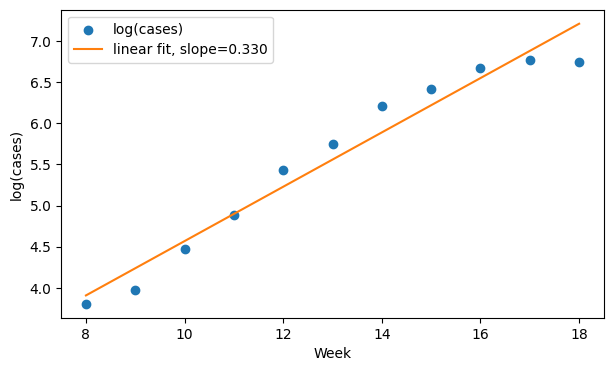

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("HW4_all_weeks.csv", header=0, names=["week", "cases"])
df['week'] = pd.to_numeric(df['week'], errors='coerce')
df = df.reset_index(drop=True)

start, end = 8, 18
mask = (df['week'] >= start) & (df['week'] <= end)
sub = df.loc[mask].copy()

sub['log_cases'] = np.log(sub['cases'])

# fit OLS: log_cases ~ week
X = sm.add_constant(sub['week'])
model = sm.OLS(sub['log_cases'], X).fit()
m_hat = model.params['week']
m_se = model.bse['week']
print(model.summary())

print("m_hat =", m_hat, "per week")

# fitted line
plt.figure(figsize=(7,4))
plt.scatter(sub['week'], sub['log_cases'], label='log(cases)')
plt.plot(sub['week'], model.predict(X), color='C1', label=f'linear fit, slope={m_hat:.3f}')
plt.xlabel('Week'); plt.ylabel('log(cases)'); plt.legend(); plt.show()


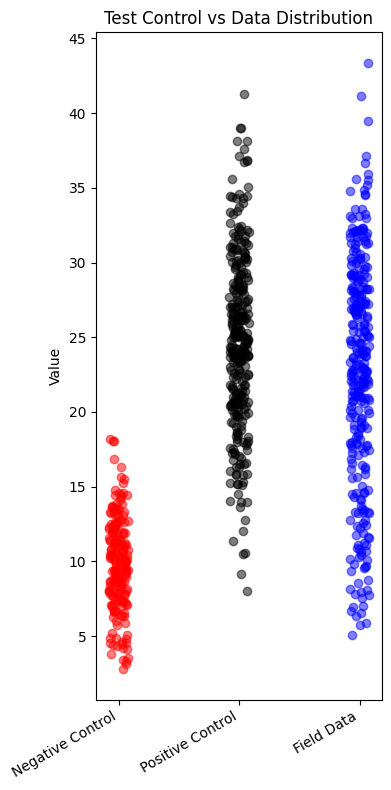

In [23]:
neg = pd.read_csv("HW4_Q3_neg-1.csv", header=None, names=["value"])
pos = pd.read_csv("HW4_Q3_pos-1.csv", header=None, names=["value"])
data = pd.read_csv("HW4_Q3_data-1.csv", header=None, names=["value"])

x_positions = {"Negative Control": 0, "Positive Control": 1, "Field Data": 2}

plt.figure(figsize=(4, 8))

def jitter(x, n, width=0.08):
    return x + np.random.uniform(-width, width, n)

plt.scatter(jitter(x_positions["Negative Control"], len(neg)), neg["value"],
            color="red", alpha=0.5, label="Negative Control")

plt.scatter(jitter(x_positions["Positive Control"], len(pos)), pos["value"],
            color="black", alpha=0.5, label="Positive Control")

plt.scatter(jitter(x_positions["Field Data"], len(data)), data["value"],
            color="blue", alpha=0.5, label="Field Data")

plt.xticks(list(x_positions.values()), list(x_positions.keys()), rotation=30, ha="right")
plt.ylabel("Value")
plt.title("Test Control vs Data Distribution")

plt.tight_layout()
plt.show()

In [56]:
c = 15

se = sum([v > c for v in pos.values])/len(pos.values)
print(f"se: {se}")

sp = sum([v < c for v in neg.values])/len(neg.values)
print(f"sp: {sp}")

phi = sum([v > c for v in data.values])/len(data.values)
print(f"phi: {phi}")

theta = (phi + sp - 1) / (se + sp - 1)
print(f"theta: {theta}")

J = se + sp - 1
print(f"J(C): {J}")

se: [0.96]
sp: [0.96]
phi: [0.80666667]
theta: [0.83333333]
J(C): [0.92]
